In [2]:
import os
import sys
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread


# KERAS

from keras import backend as K
from keras.models import Model
from keras.preprocessing import image

from keras.models import load_model


# 
import numpy as np

# HELPERS
location = lambda x: os.path.join('/home/trongkha/Documents/MalwareImages/kha-model/dataset8', x)

try:
    from PIL import Image as pil_image
except ImportError:
    pil_image = None

%matplotlib inline

In [4]:
TRAIN_SET = location('train')
VAL_SET = location('validation')
MODEL_PATH = location('/home/trongkha/Documents/MalwareImages/kha-model/checkpoints/weights_bestmodel.hdf5')

# model configuarations
model = load_model(MODEL_PATH)
single_input_shape, input_channels =  model.get_input_shape_at(0)[1:], model.get_input_shape_at(0)[3]

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        18496     
__________

In [8]:
BENIGN_SAMPLE = location('train/benign/AxInstUI.exe.png')
MAL_SAMPLE = location('train/malicious/1a802883e6b13c777a4d63f89ea238bf43163e220107bb996cd8fc4a7dfd2a71.png')

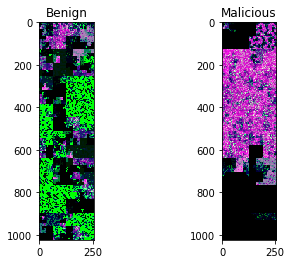

In [9]:
bpic = pil_image.open(BENIGN_SAMPLE)
mpic = pil_image.open(MAL_SAMPLE)

fig, ax = plt.subplots(nrows=1,ncols=2)
plt.subplot(1,2,1)
plt.imshow(bpic) # benign on the left
plt.title('Benign')

plt.subplot(1,2,2) # malicious on the right
plt.imshow(mpic)
plt.title('Malicious')

In [10]:
def get_outputs_generator(model, layer_name):
    return Model(
        inputs=model.input,
        outputs=model.get_layer(layer_name).output
    ).predict

In [62]:
def load_img(input_path):
    pic = pil_image.open(input_path)
    pic = pic.resize((256,256), pil_image.BILINEAR)
    img_arr = np.asarray(pic).reshape(single_input_shape)
    return np.expand_dims(img_arr, axis=0)

In [63]:
def get_outputs(predict_img):
    layer_outputs = get_outputs_generator(model,'max_pooling2d_3')(predict_img)
    # DEBUG
    # print('Output layer shape: ', layer_outputs.shape)
    
    # Deprocessing
    outputs = np.rollaxis(layer_outputs[0], 2,0)
    # print('Deprocessing: ', outputs.shape)
    return outputs

In [65]:
benign_outputs = get_outputs(load_img(BENIGN_SAMPLE))
mal_outputs = get_outputs(load_img(MAL_SAMPLE))
print("B: {}, M: {}".format(benign_outputs.shape, mal_outputs.shape))

B: (64, 30, 30), M: (64, 30, 30)


In [66]:
def plot_pair(b,m):
    fig, ax = plt.subplots(nrows=1,ncols=2)
    plt.subplot(1,2,1)
    plt.imshow(b) # benign on the left

    plt.subplot(1,2,2) # malicious on the right
    plt.imshow(m)

/home/trongkha/local/kvt3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


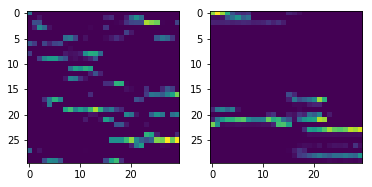

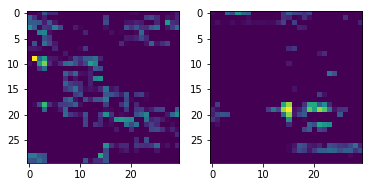

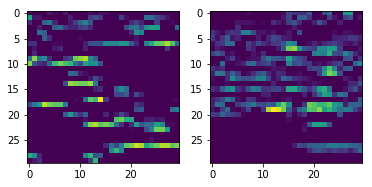

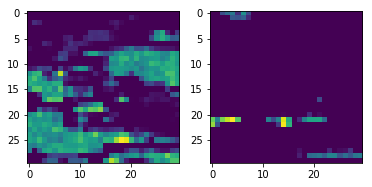

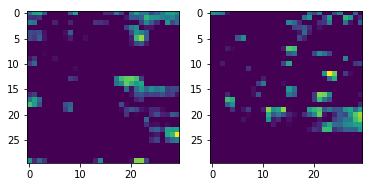

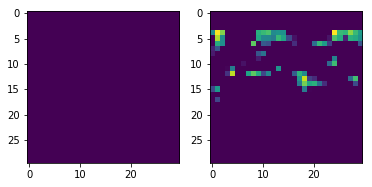

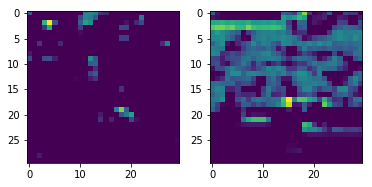

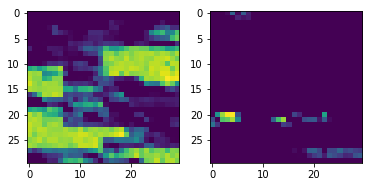

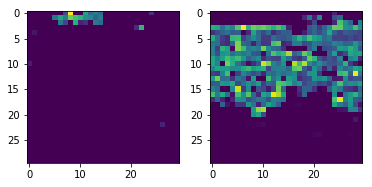

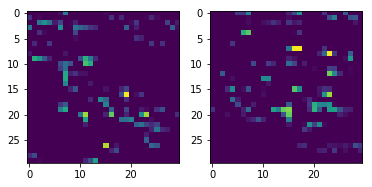

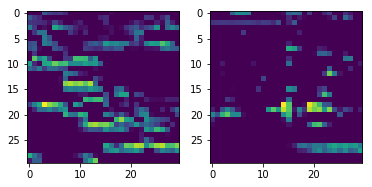

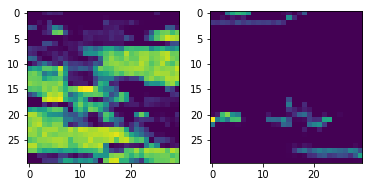

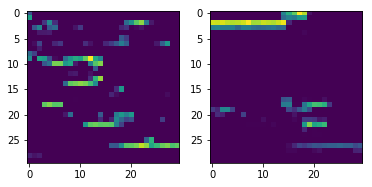

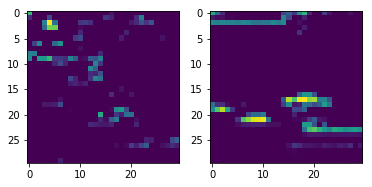

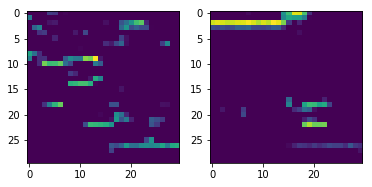

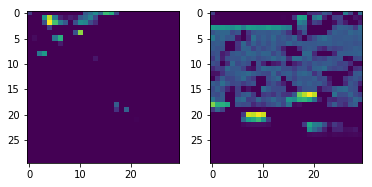

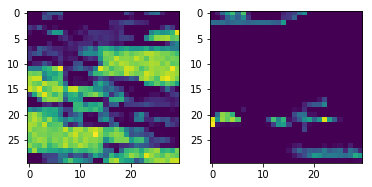

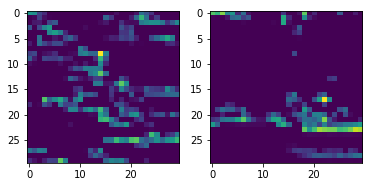

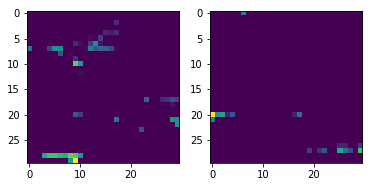

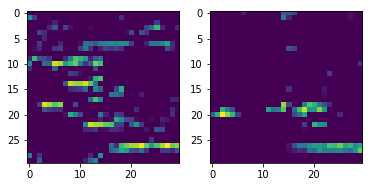

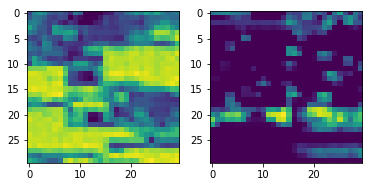

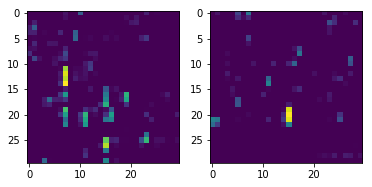

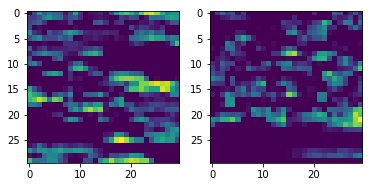

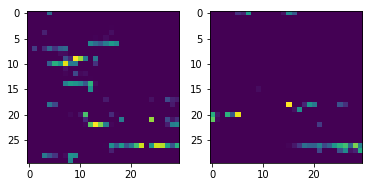

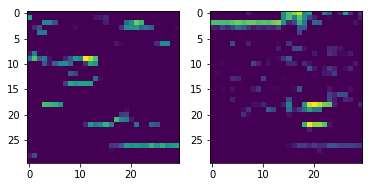

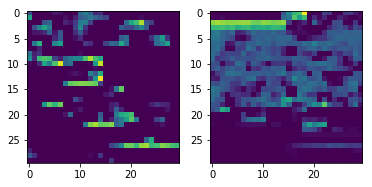

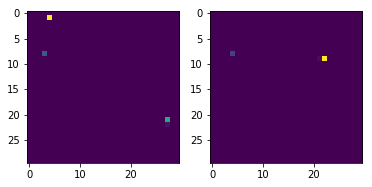

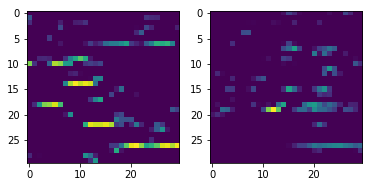

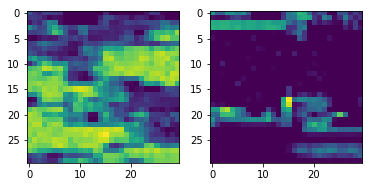

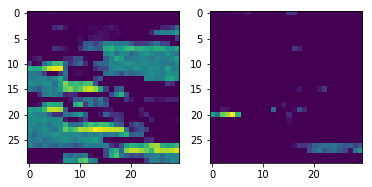

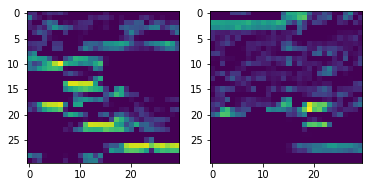

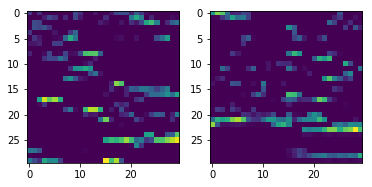

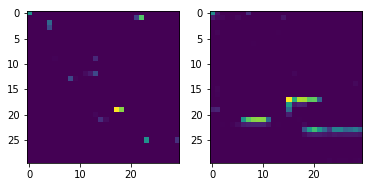

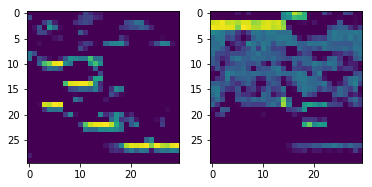

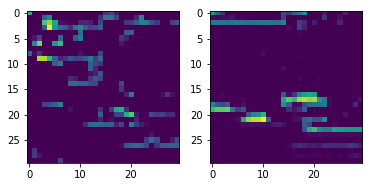

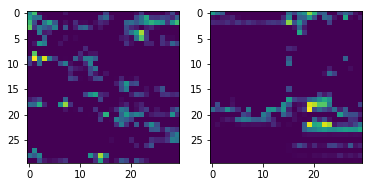

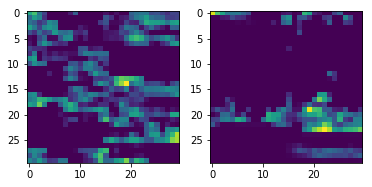

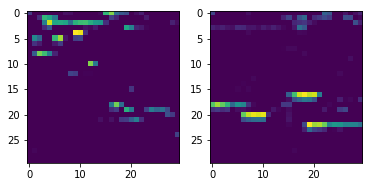

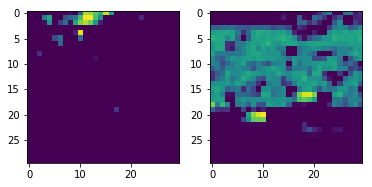

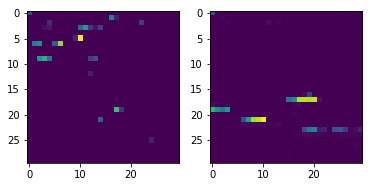

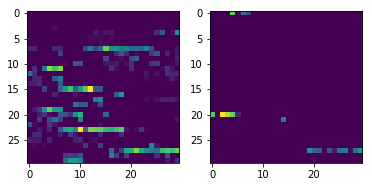

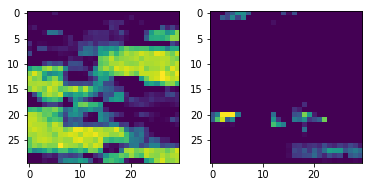

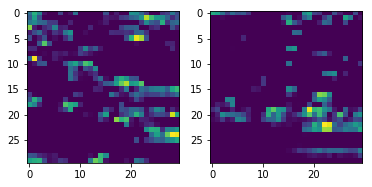

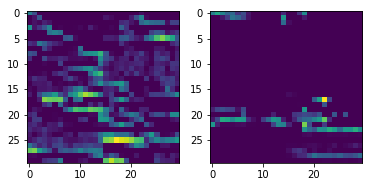

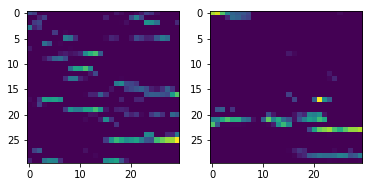

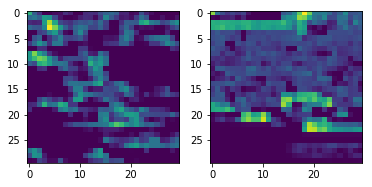

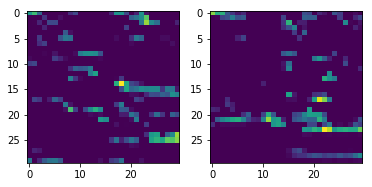

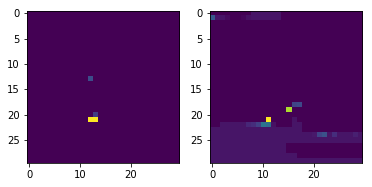

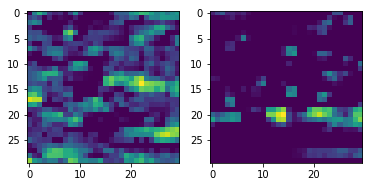

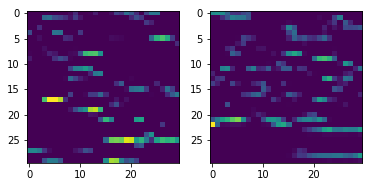

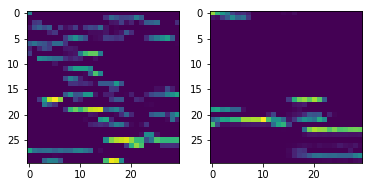

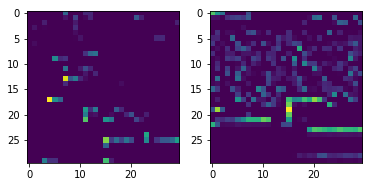

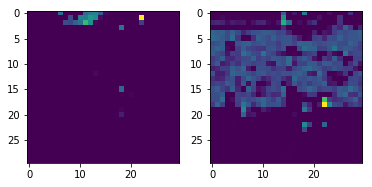

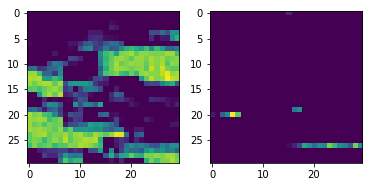

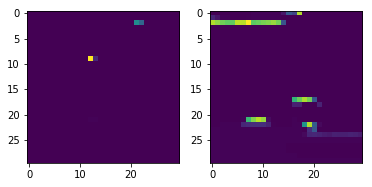

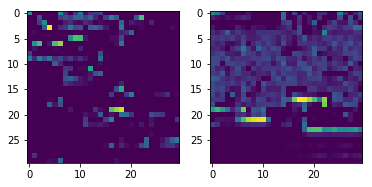

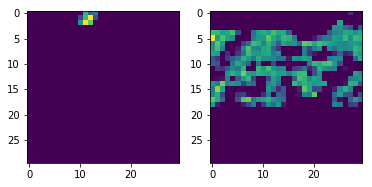

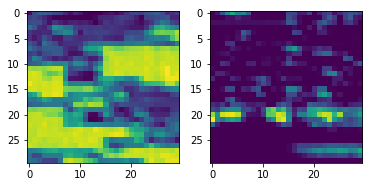

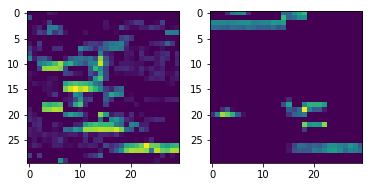

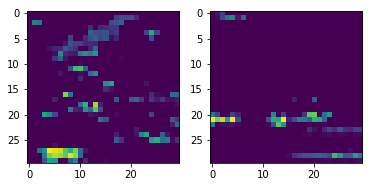

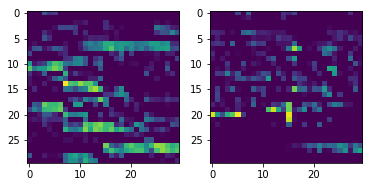

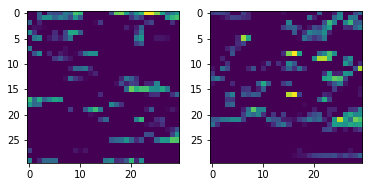

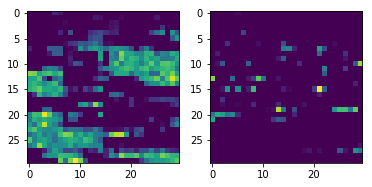

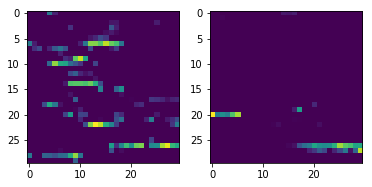

In [67]:
for b,m in zip(benign_outputs, mal_outputs):
    plot_pair(b,m)

# Average

In [70]:
def plot_average(matrix_list):
    plt.imshow(np.average(matrix_list,axis=0))

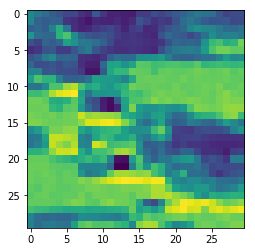

In [71]:
b_list = [im for im in benign_outputs]
m_list = [im for im in mal_outputs]

plot_average(b_list)

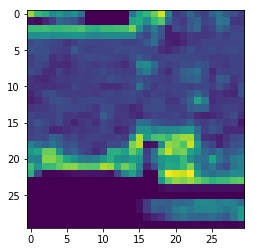

In [72]:
plot_average(m_list)

In [73]:
mal_dir = location('validation/malicious')
limit = 40
benign_dir = location('validation/benign')

def build_generator(folder):
    count = 0
    for file in os.listdir(folder):
        count += 1
        if count > limit:
            break
        yield os.path.join(folder, file)

mal_gen = build_generator(mal_dir)
benign_gen = build_generator(benign_dir)

In [74]:
def get_mean(img_path):
    outputs = get_outputs(load_img(img_path))
    return np.average(outputs,axis=0)

/home/trongkha/local/kvt3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


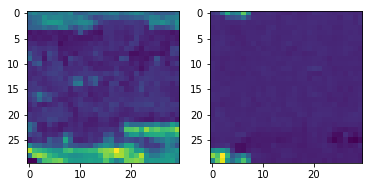

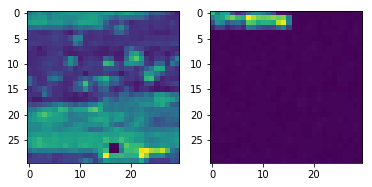

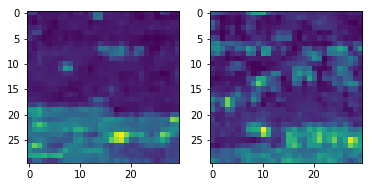

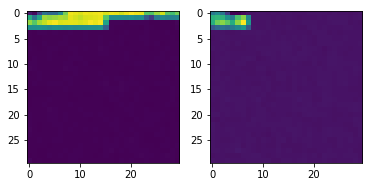

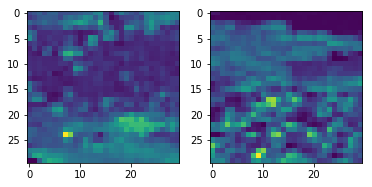

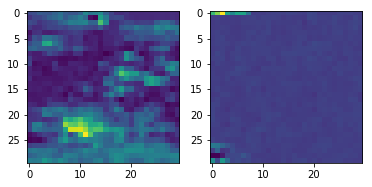

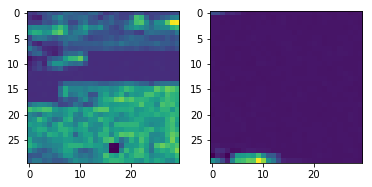

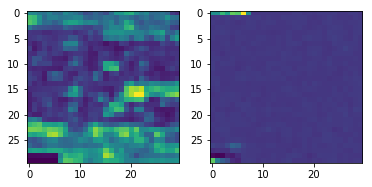

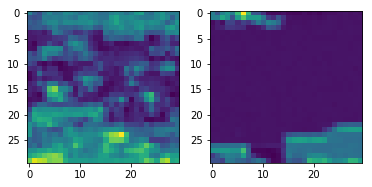

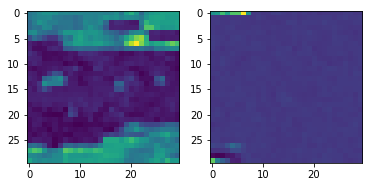

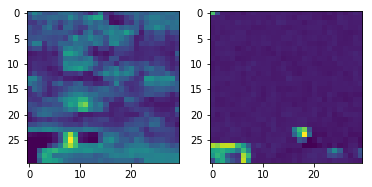

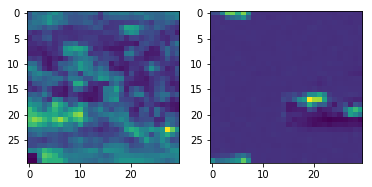

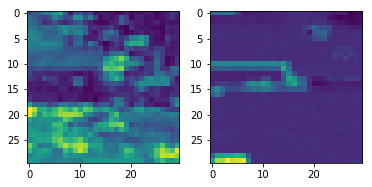

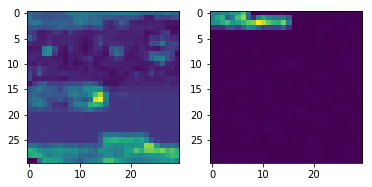

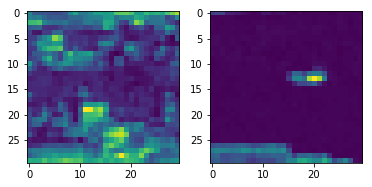

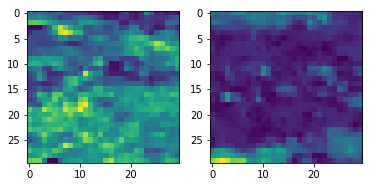

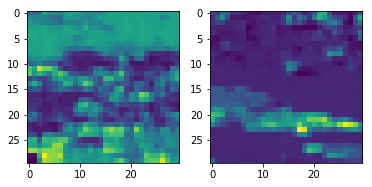

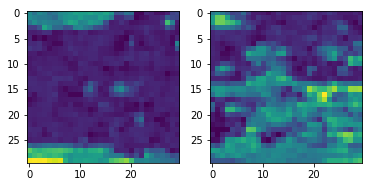

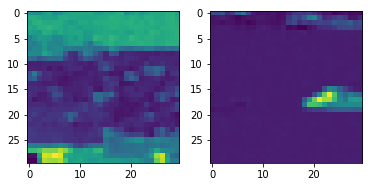

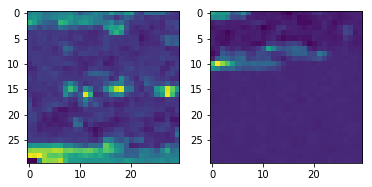

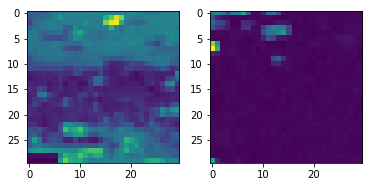

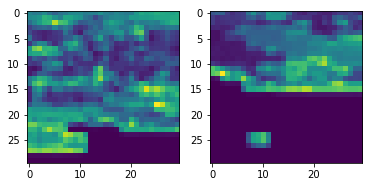

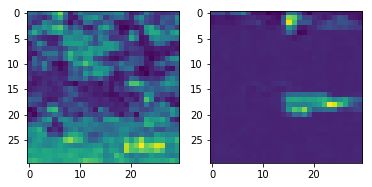

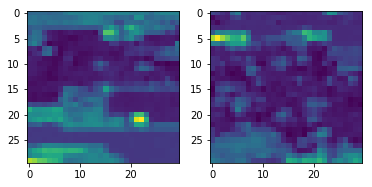

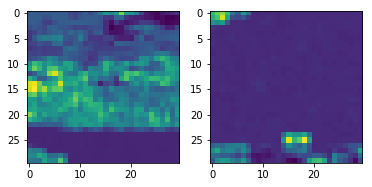

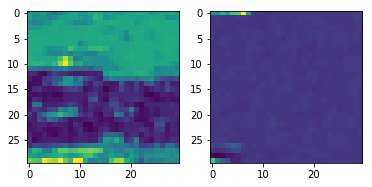

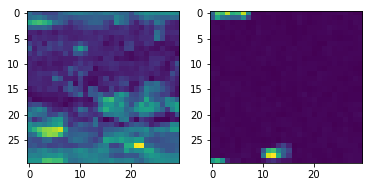

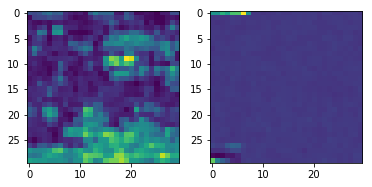

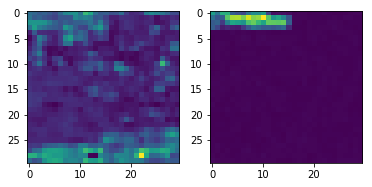

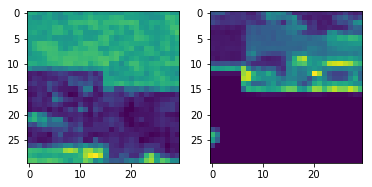

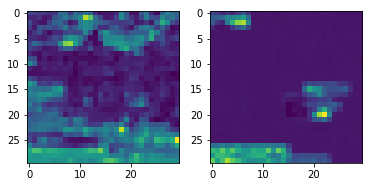

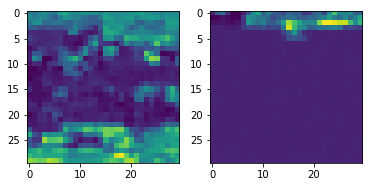

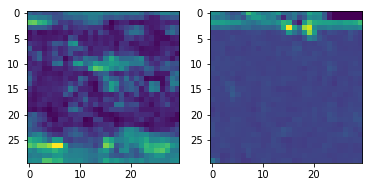

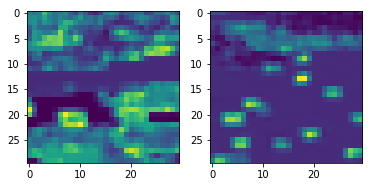

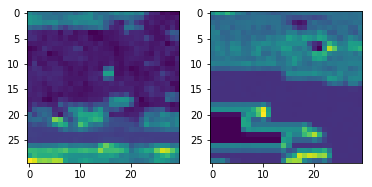

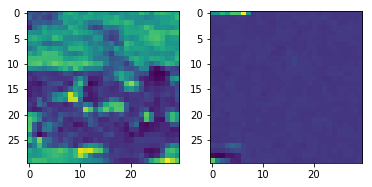

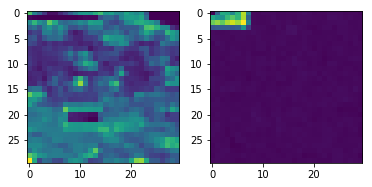

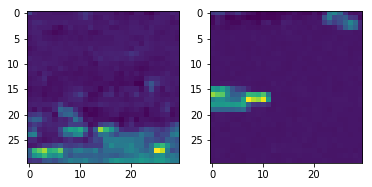

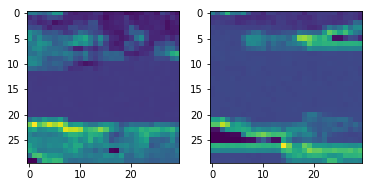

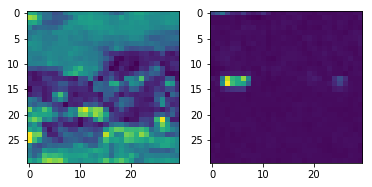

In [75]:
blist = [get_mean(im) for im in benign_gen]
mlist = [get_mean(im) for im in mal_gen]

for b,m in zip(blist,mlist):
    plot_pair(b,m)